In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_profile_logs(logs_df: pd.DataFrame):
    g = sns.FacetGrid(
        logs_df, 
        row="section_name", 
        col="max_new_tokens", 
        margin_titles=True, 
        height=3, 
        aspect=1.5
    )

    g.map(sns.lineplot, "number_suffixes", "duration", "client_type", marker="o")

    g.set_axis_labels("number suffixes", "duration (s)")
    g.add_legend(title="client_type")
    g.set_titles(row_template="{row_name}", col_template="max tokens: {col_name}")

    for ax in g.axes.flat:
        ax.grid(True)

    plt.title("average time (per suffix)")
    plt.show()

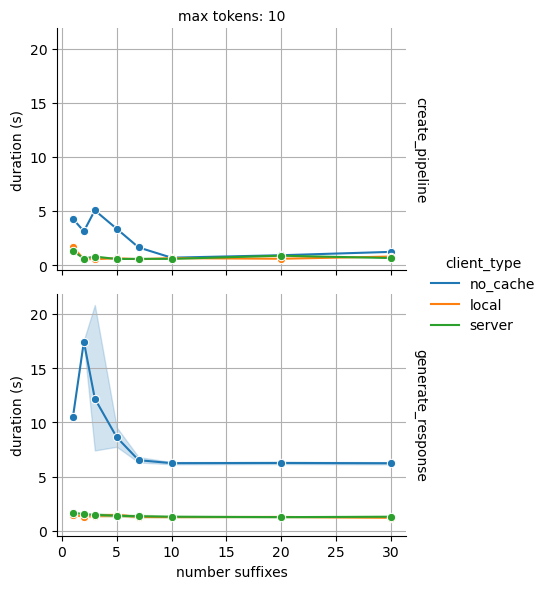

In [38]:
logs_df = pd.read_json("profile_logs.jsonl", lines=True)
filtered_logs_df = logs_df[logs_df["section_name"].isin(["generate_response", "create_pipeline"])]


for prompt_name in ["wikipedia_llms"]:
    prompt_filtered_logs_df = filtered_logs_df.query(f"prompt_name == '{prompt_name}' and metadata == 'nov-13-run-7'")
    plot_profile_logs(prompt_filtered_logs_df)